In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os

In [51]:
PATH = os.path.join('alpha')
actions = np.array(os.listdir(PATH))
label_map={label:num for num,label in enumerate(actions)}
print(label_map)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}


In [52]:
act_len=len(actions)
no_sequences = 30 #30 vids for each action
sequence_length = 15# each vid 30 frame length

In [53]:
feat,labels = [],[]
for act in actions:
    for seq in range(no_sequences):
        window=[]
        for frame in range(sequence_length):
            res = np.load(os.path.join(PATH,act,str(seq),f"{frame}.npy"))
            window.append(res)
        feat.append(window)
        labels.append(label_map[act])

In [54]:
X=np.array(feat)
y=to_categorical(labels).astype(int)

In [55]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.1,random_state=5)

In [56]:
print(Xtrain.shape,Xtest.shape)

(702, 15, 63) (78, 15, 63)


In [57]:
print(ytrain.shape,ytest.shape)

(702, 26) (78, 26)


In [11]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [58]:
# 10,126 for alpha
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15, 63)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [59]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 15, 64)            32768     
                                                                 
 lstm_10 (LSTM)              (None, 15, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 26)                858       
                                                                 
Total params: 188,090
Trainable params: 188,090
Non-tr

In [65]:
history=model.fit(Xtrain,ytrain,epochs=5,validation_data=(Xtest, ytest))

Epoch 1/5
25/25 [==============================] - 1s 48ms/step - loss: 0.1404 - categorical_accuracy: 0.9641
Epoch 2/5
25/25 [==============================] - 1s 52ms/step - loss: 0.0960 - categorical_accuracy: 0.9667
Epoch 3/5
25/25 [==============================] - 1s 48ms/step - loss: 0.1288 - categorical_accuracy: 0.9564
Epoch 4/5
25/25 [==============================] - 1s 52ms/step - loss: 0.1549 - categorical_accuracy: 0.9462
Epoch 5/5
25/25 [==============================] - 1s 52ms/step - loss: 0.1770 - categorical_accuracy: 0.9397


In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

25/25 [==============================] - 1s 18ms/step


In [67]:
ytrue = np.argmax(y, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytrue, yhat)

0.9705128205128205

In [74]:
import keras
keras.models.save_model(model,filepath='Model/model2_alphabet.h5')

In [69]:
cm = confusion_matrix(ytrue,yhat)

<AxesSubplot:>

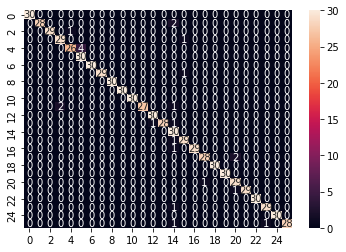

In [70]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [154]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("recall:",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# print("true neg rate:",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
# print("Neg pred value:",NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall out:",FPR)
# False negative rate
FNR = FN/(TP+FN)
# print("False neg rate;",FNR)
# False discovery rate
FDR = FP/(TP+FP)
# print("False discovery rate:",FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",ACC)

recall: [1.         1.         1.         1.         1.         1.
 1.         1.         0.96666667 1.         1.         0.96666667
 0.96666667 0.7        1.         0.96666667 0.93333333 1.
 1.         1.         1.         0.56666667 1.         0.96666667
 0.9        0.96666667]
Precision: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.78378378 0.84       0.85714286 1.         1.         1.
 1.         1.         0.69767442 1.         0.96774194 1.
 0.96428571 0.96666667]
Fall out: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01066667 0.00533333 0.00666667 0.         0.         0.
 0.         0.         0.01733333 0.         0.00133333 0.
 0.00133333 0.00133333]
Accuracy: [1.         1.         1.         1.         1.         1.
 1.         1.         0.99871795 1.         1.         0.99871795
 0.98846154 0.98333333 0.99358974 0.998

In [72]:
import numpy as np
import time
import os
import mediapipe as mp
from matplotlib import pyplot as plt
import cv2
from keras.models import load_model

mp_holistic = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utils

def extract_keypoints(result):
    # pose = np.array([[res.x,res.y,res.z,res.visibility] for res in result.pose_landmarks.landmark] if result.pose_landmarks else np.zeros(33*4)).flatten()
    # lh = np.array([[res.x,res.y,res.z] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*3)).flatten()
    rh = np.array([[res.x,res.y,res.z] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*3)).flatten()
    # return np.concatenate([pose,lh,rh])
    return rh

def mp_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    res = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,res

def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(142,110,60)),mp_drawing.DrawingSpec(color=(142,110,60)))
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(142,110,60)),mp_drawing.DrawingSpec(color=(142,110,60)))
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(142,110,60)),mp_drawing.DrawingSpec(color=(142,110,60)))    
    return image



sequence = []
sentence = []
predictions = []
threshold = 0.5
val=""
# collections
cap = cv2.VideoCapture(0)
x=0
with mp_holistic.Holistic(min_detection_confidence=0.6,min_tracking_confidence=0.8) as holistic:
    while cap.isOpened():
        #read frame
        success,frame = cap.read()

        #detection         
        image,data = mp_detection(frame,holistic)
        #draw landmark
        image = draw_landmarks(image,data)
        kp = extract_keypoints(data)

        sequence.append(kp)
        sequence = sequence[-15:]
        if len(sequence) == 15:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            val=actions[np.argmax(res)]
            predictions.append(np.argmax(res))
            # if np.unique(predictions[-10:])[0]==np.argmax(res):
            #         if res[np.argmax(res)] > threshold: 
            #             if len(sentence) > 0: 
            #                 if actions[np.argmax(res)] != sentence[-1]:
            #                     sentence.append(actions[np.argmax(res)])
            #             else:
            #                 sentence.append(actions[np.argmax(res)])   
            sequence=[] 
        
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image,val, (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # sentence=[]
        cv2.imshow("Feed",image)

        #breaking/exit feed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 34ms/step
